## DATA DICTIONNARY
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#convert date to a datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
6.450000e+05

645000.0

<Axes: >

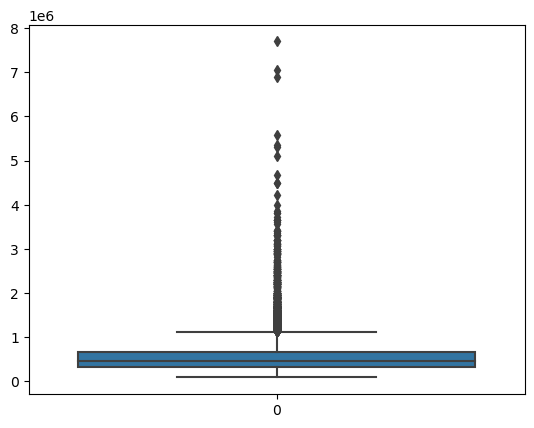

In [9]:
sns.boxplot(df['price'])

In [10]:
#setting outliers in the price column to the median


<Figure size 640x480 with 0 Axes>

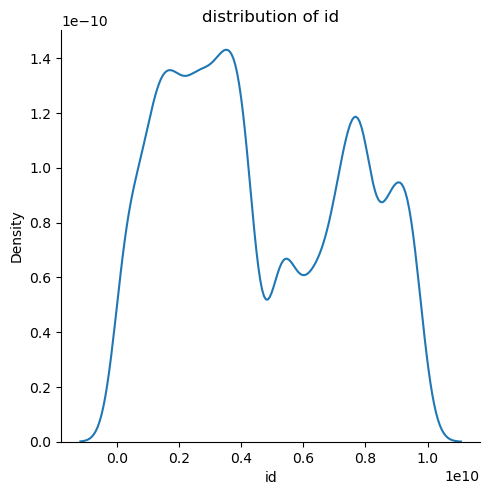

<Figure size 640x480 with 0 Axes>

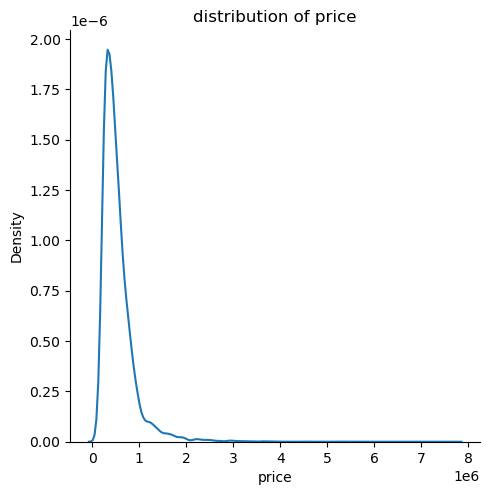

<Figure size 640x480 with 0 Axes>

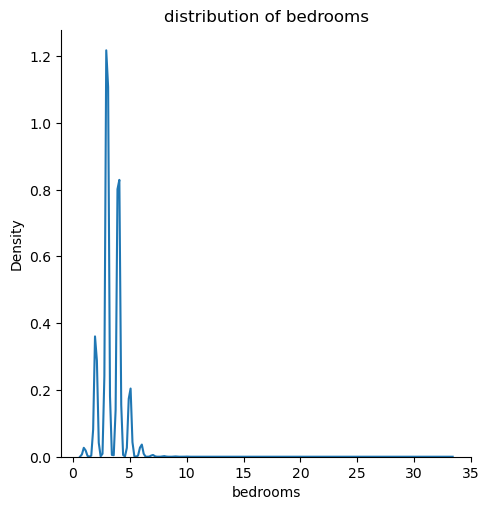

<Figure size 640x480 with 0 Axes>

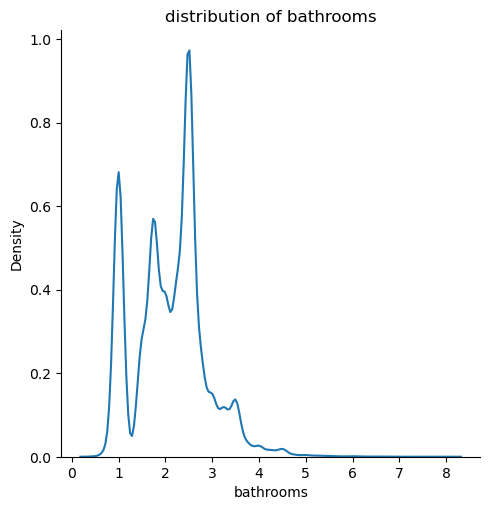

<Figure size 640x480 with 0 Axes>

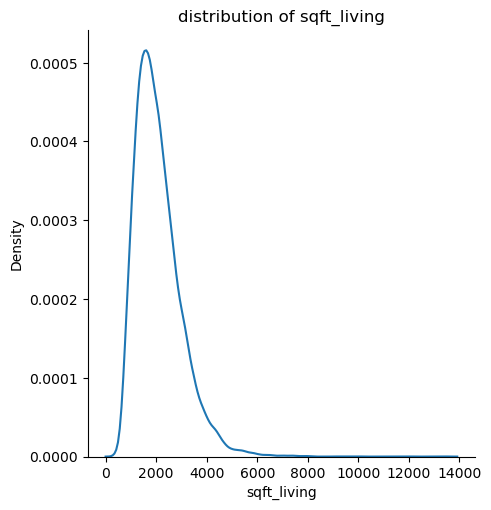

<Figure size 640x480 with 0 Axes>

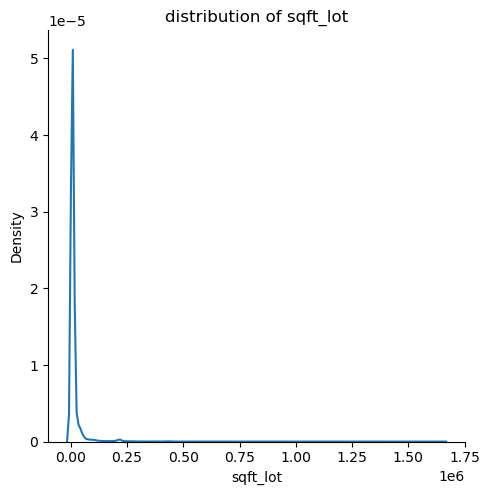

<Figure size 640x480 with 0 Axes>

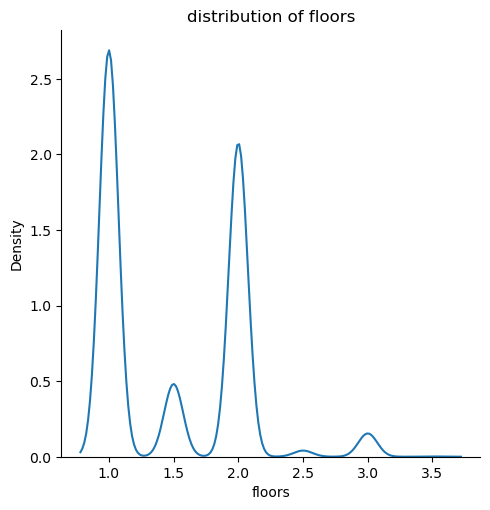

<Figure size 640x480 with 0 Axes>

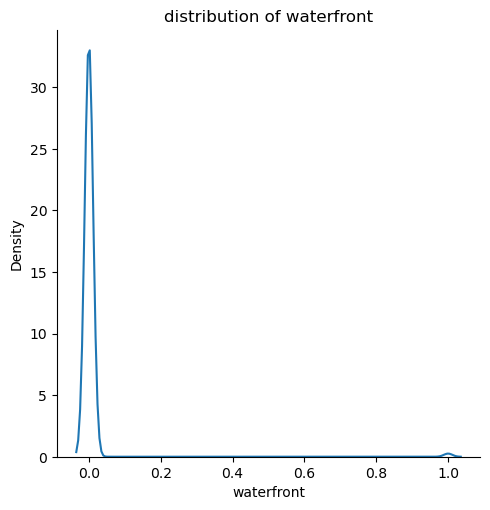

<Figure size 640x480 with 0 Axes>

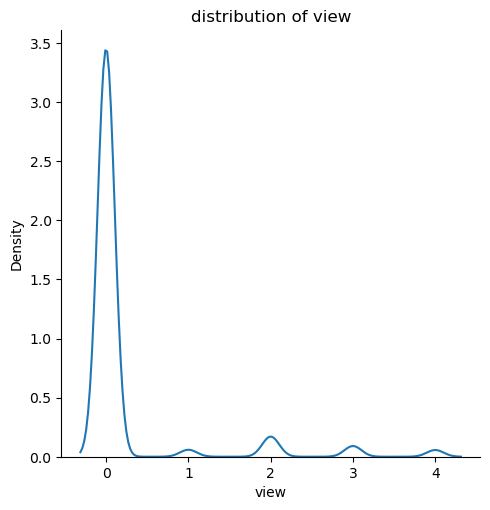

<Figure size 640x480 with 0 Axes>

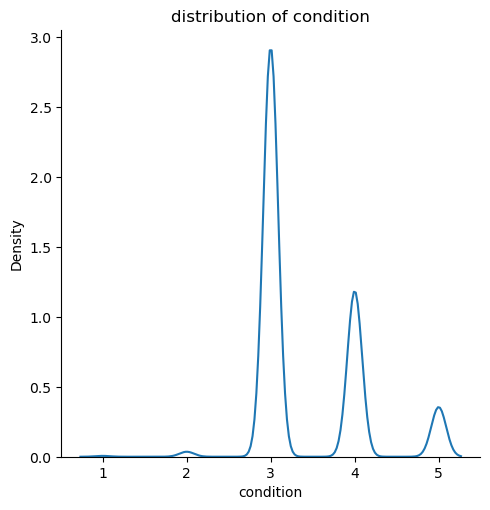

<Figure size 640x480 with 0 Axes>

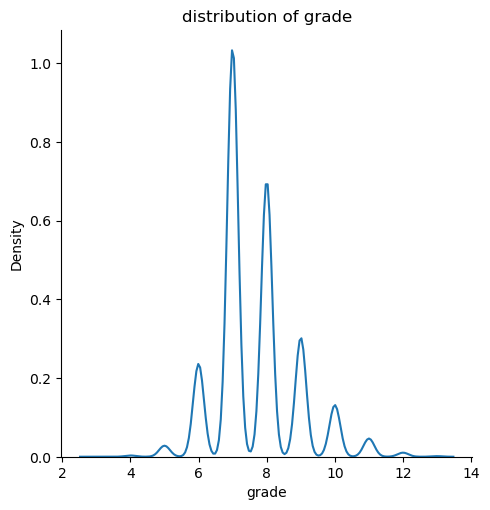

<Figure size 640x480 with 0 Axes>

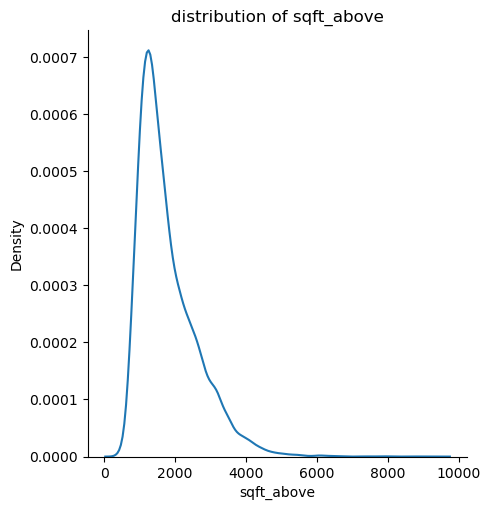

<Figure size 640x480 with 0 Axes>

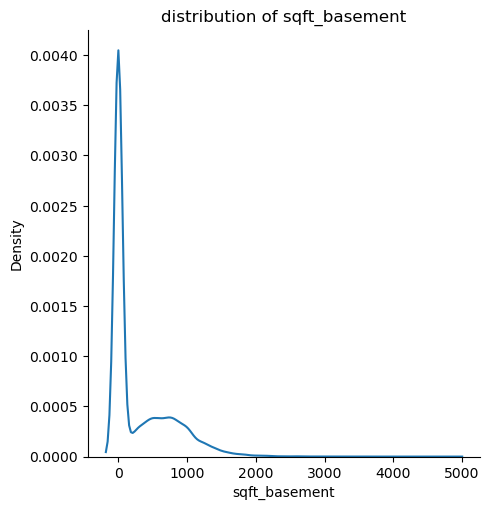

<Figure size 640x480 with 0 Axes>

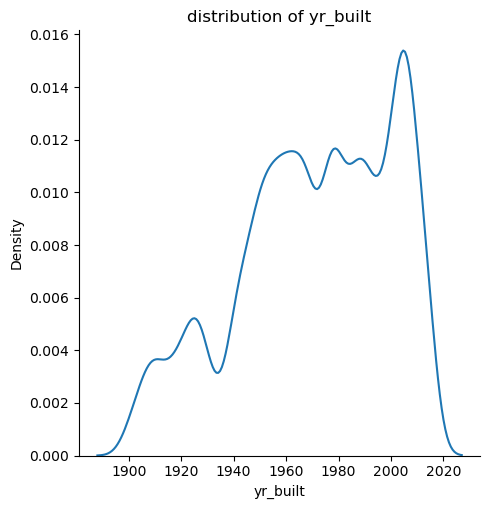

<Figure size 640x480 with 0 Axes>

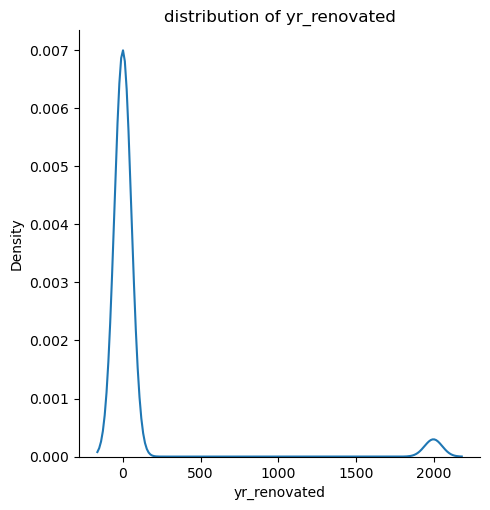

<Figure size 640x480 with 0 Axes>

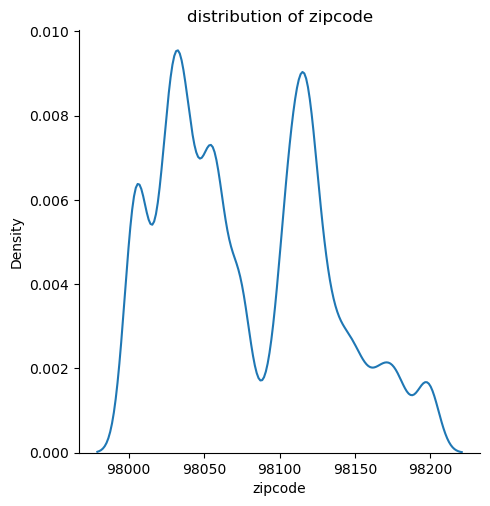

<Figure size 640x480 with 0 Axes>

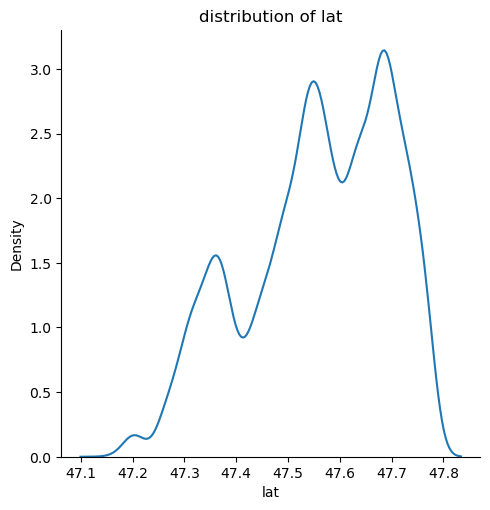

<Figure size 640x480 with 0 Axes>

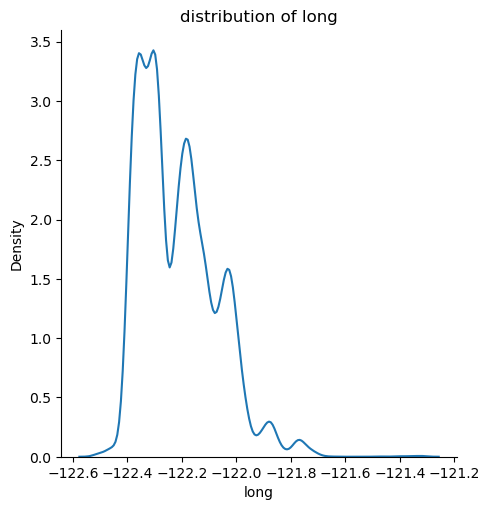

<Figure size 640x480 with 0 Axes>

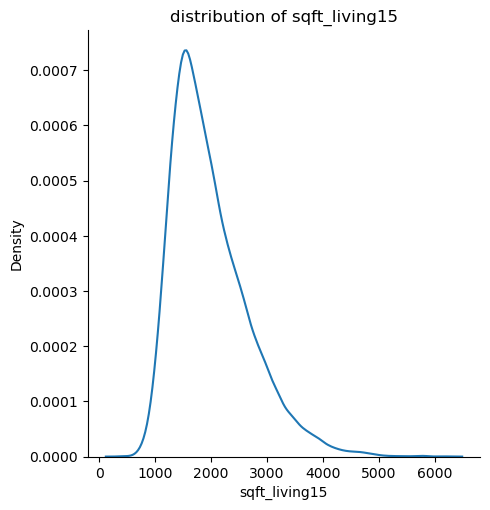

<Figure size 640x480 with 0 Axes>

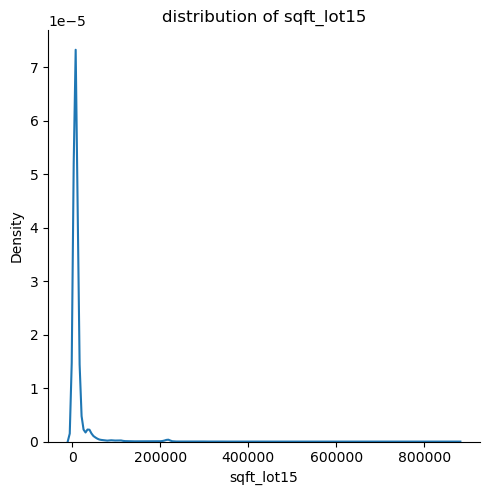

In [11]:
for i in df.select_dtypes(include=['int','float']):
    plt.figure()
    sns.displot(df[i], kind='kde')
    plt.title(f'distribution of {i}')

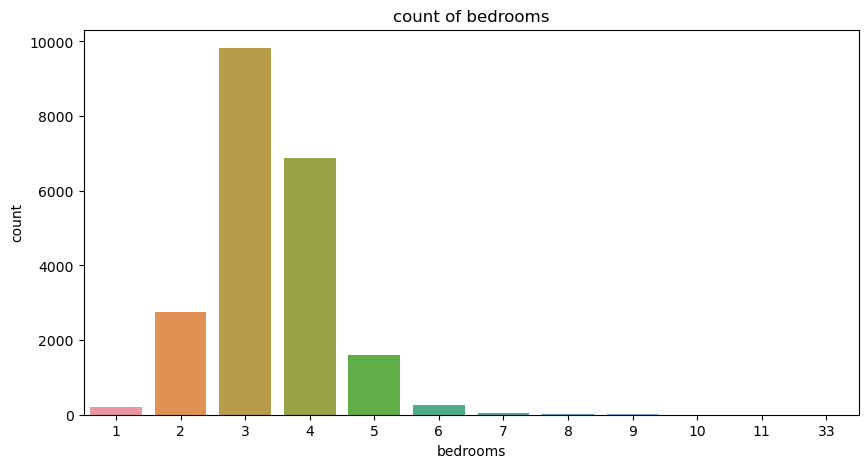

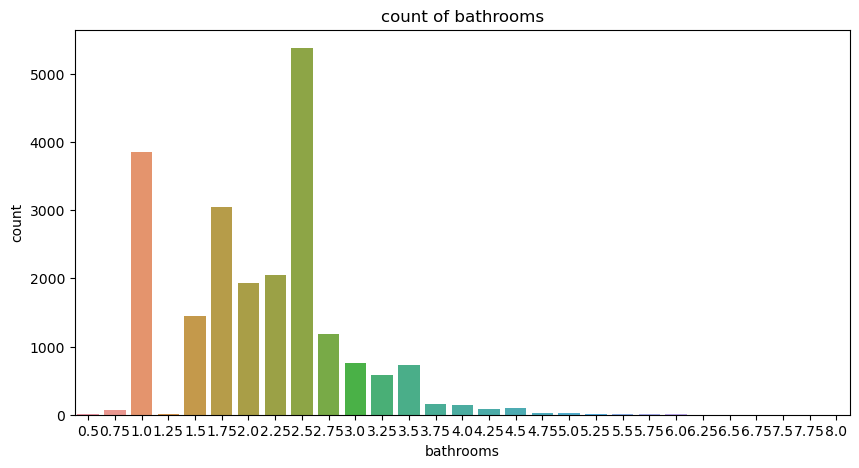

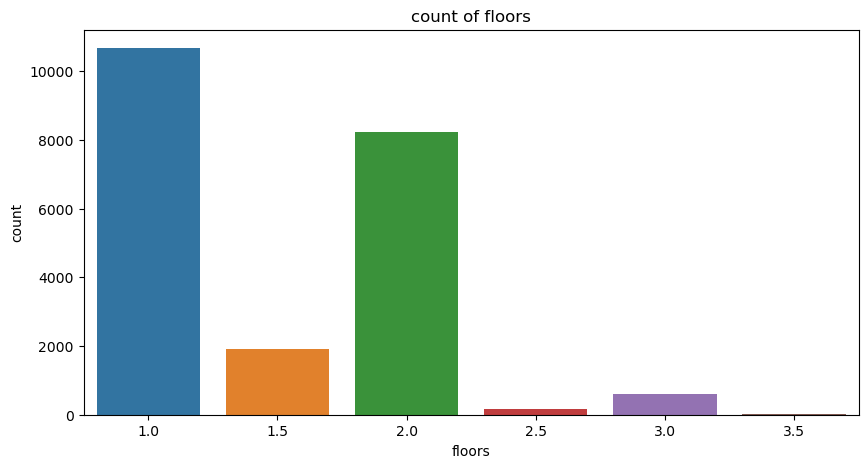

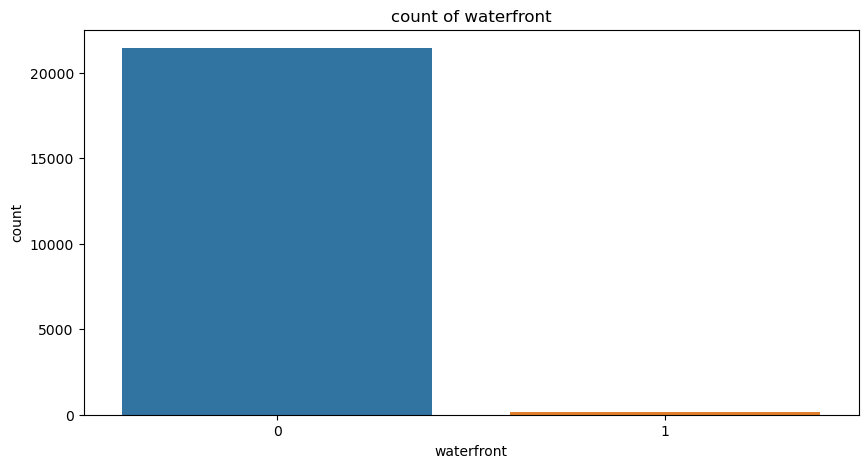

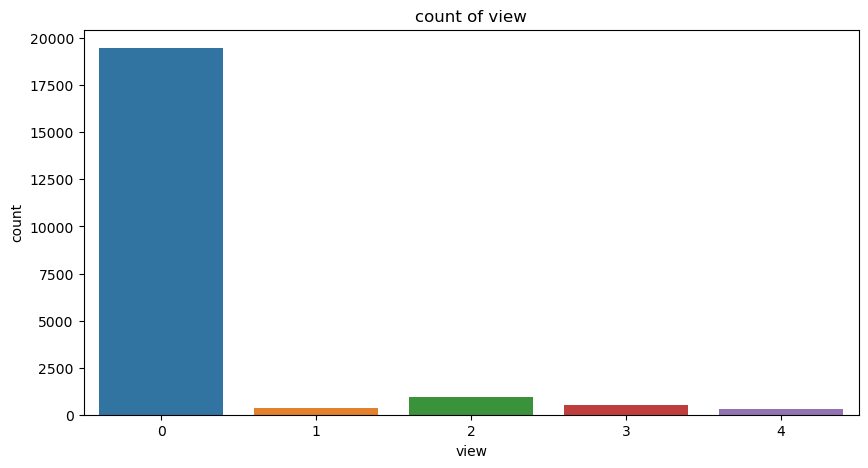

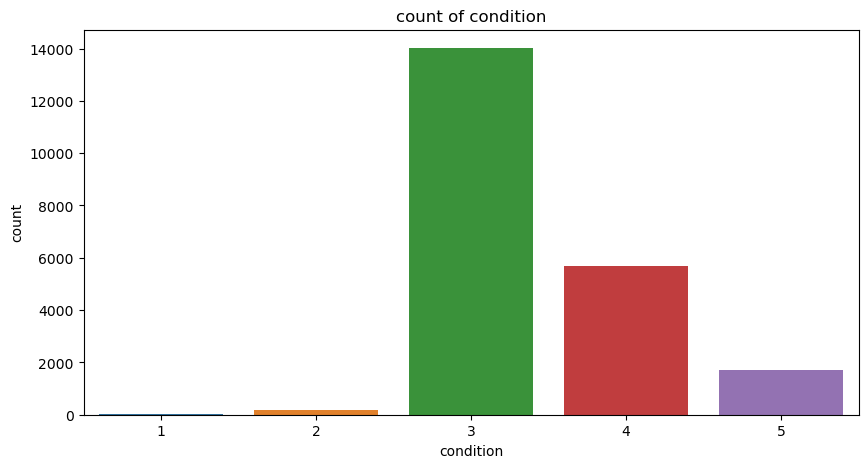

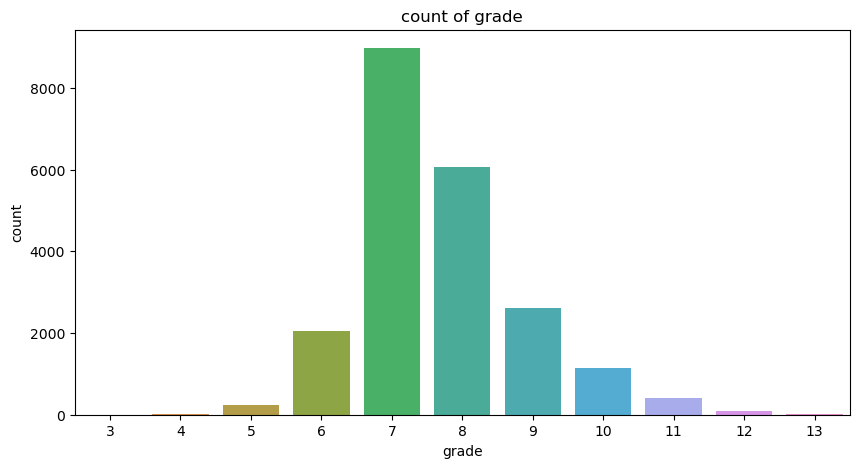

In [12]:
for c in ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']:
    plt.figure(figsize=(10,5))
    sns.countplot(x=c, data=df)
    plt.title(f'count of {c}')

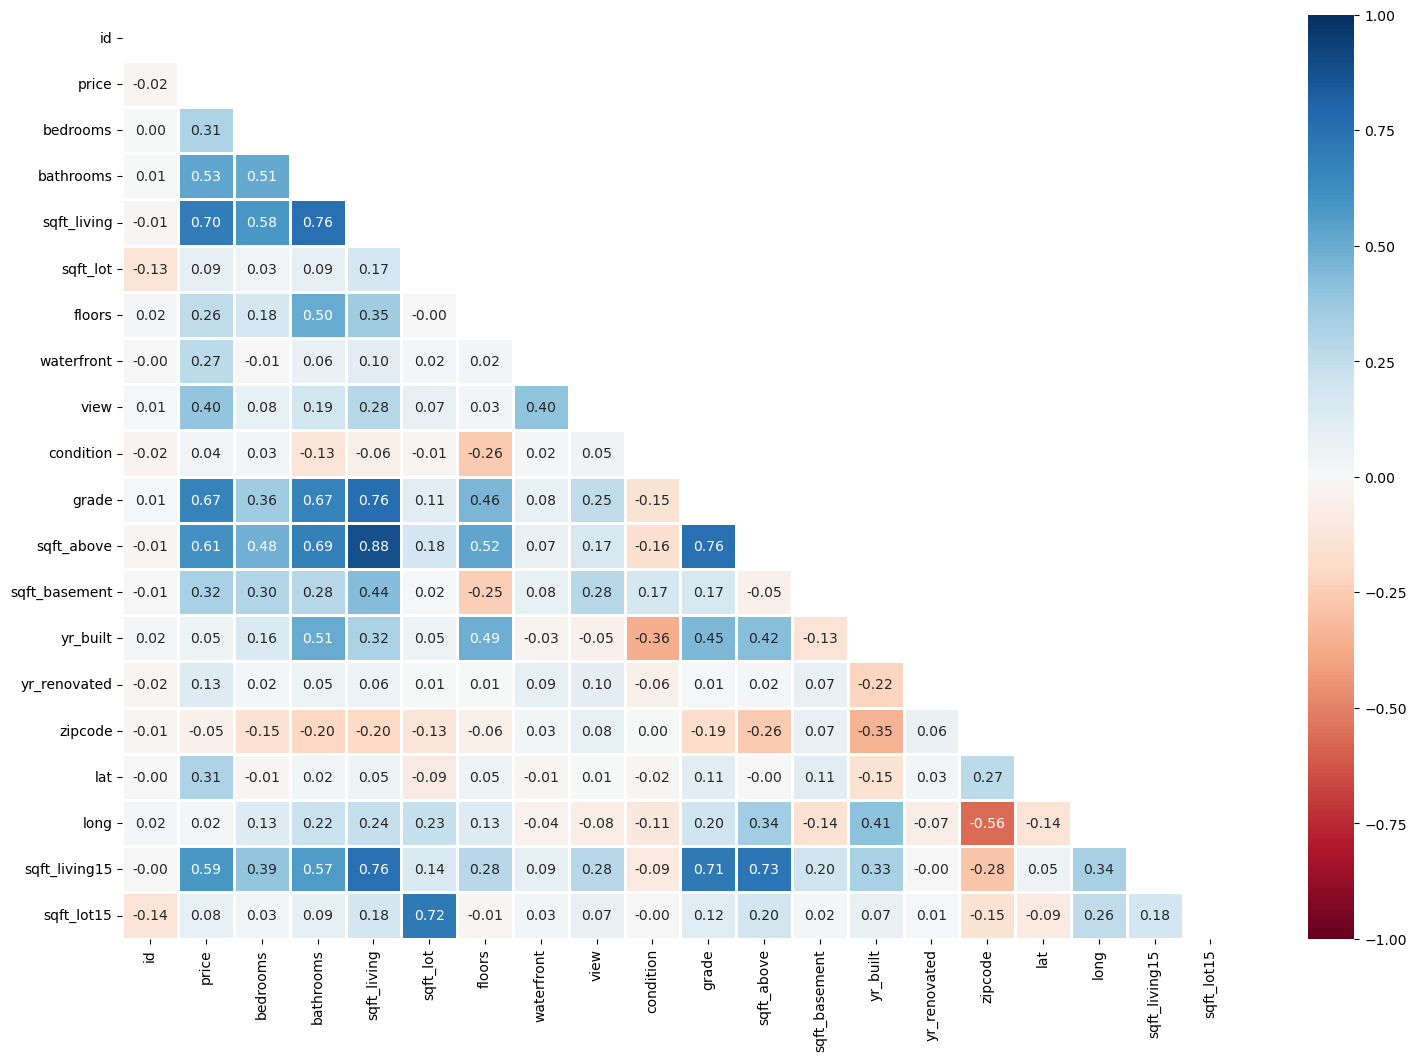

In [13]:
#correlation
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, center=0, cmap ="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

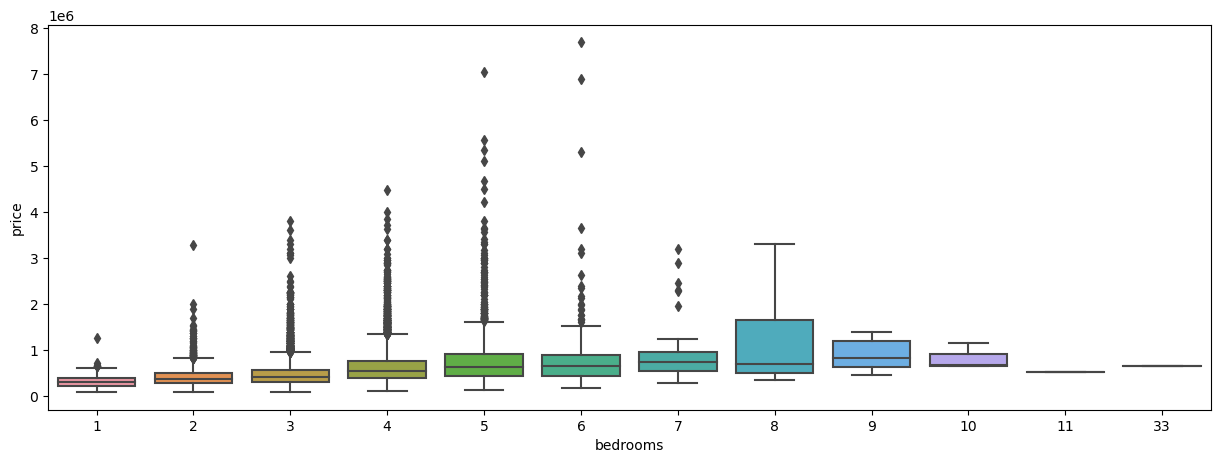

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(y='price', x='bedrooms', data=df)

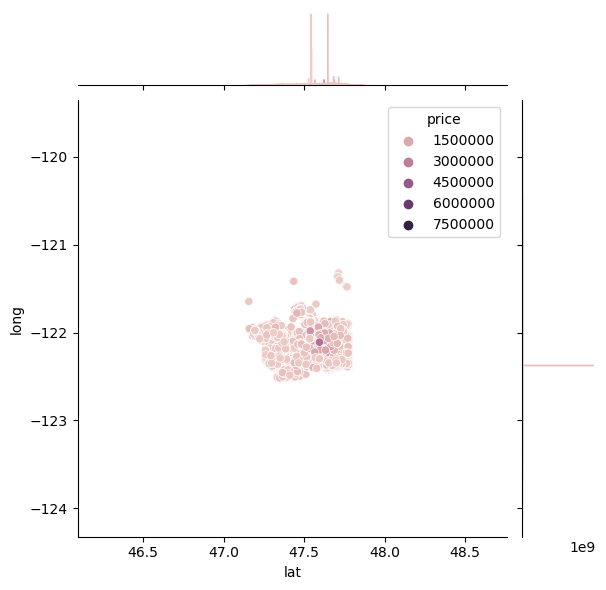

In [15]:
sns.jointplot(x='lat', y='long', hue='price', data=df)

<Axes: xlabel='waterfront', ylabel='price'>

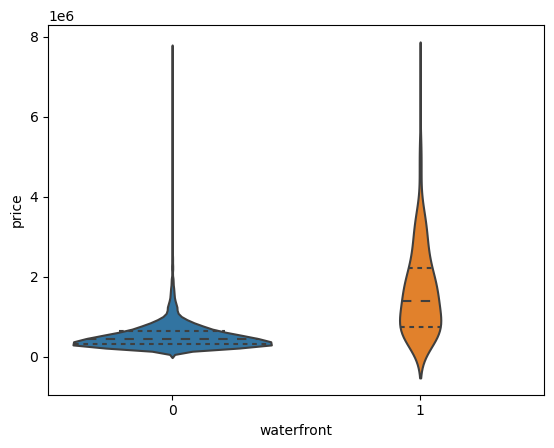

In [16]:
sns.violinplot(x='waterfront',y='price', data=df, inner='quart',fill=False)

In [17]:
#feaure engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


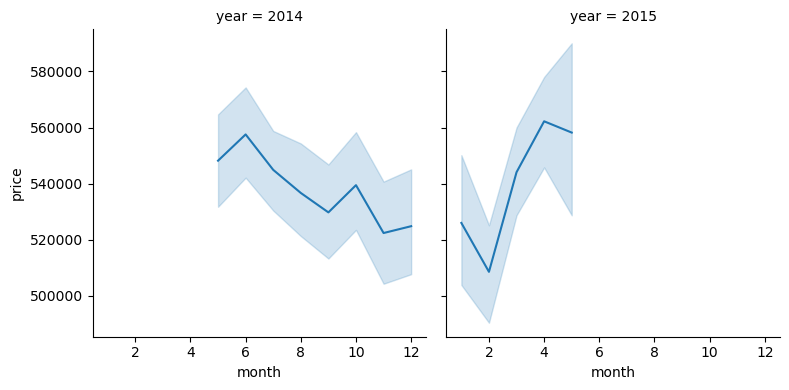

In [19]:
g = sns.FacetGrid(df, col='year', col_wrap=2, height=4)
g.map(sns.lineplot, 'month', 'price')

In [20]:
len(df)*0.01
new_df = df.sort_values('price',ascending=False).iloc[216:]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [22]:
#convert yr_renovated to category then encode it
# bins = [-float('inf'), 0, float('inf')]
# labels = ['No Renovation', 'Renovated']
# df['yr_renovated'] = pd.cut(df['yr_renovated'], bins=bins, labels=labels, right=True)
# df['yr_renovated'] = df['yr_renovated'].replace(['No Renovation', 'Renovated'],(0,1))

In [23]:
#convert yr_renovated to category then encode it
# bins = [-float('inf'), 0, float('inf')]
# labels = ['No Basement', 'Basement']
# df['sqft_basement'] = pd.cut(df['sqft_basement'], bins=bins, labels=labels, right=True)
# df['sqft_basement'] = df['sqft_basement'].replace(['No Basement', 'Basement'],(0,1))

In [24]:
df = df.drop(['id','zipcode','date'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [26]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [27]:
X_train, X_test,y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=42)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape

(14469, 19)

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
         batch_size = 128, epochs=400)

Epoch 1/400

114/114 [==============================] - 3s 6ms/step - loss: 430859878400.0000 - val_loss: 418637479936.0000
Epoch 2/400
114/114 [==============================] - 0s 4ms/step - loss: 429069139968.0000 - val_loss: 412260630528.0000
Epoch 3/400
114/114 [==============================] - 0s 4ms/step - loss: 403046006784.0000 - val_loss: 353557184512.0000
Epoch 4/400
114/114 [==============================] - 0s 4ms/step - loss: 286747000832.0000 - val_loss: 185722634240.0000
Epoch 5/400
114/114 [==============================] - 0s 4ms/step - loss: 132177117184.0000 - val_loss: 98354421760.0000
Epoch 6/400
114/114 [==============================] - 0s 4ms/step - loss: 99866943488.0000 - val_loss: 95463792640.0000
Epoch 7/400
114/114 [==============================] - 0s 4ms/step - loss: 97644650496.0000 - val_loss: 93681598464.0000
Epoch 8/400
114/114 [==============================] - 0s 4ms/step - loss: 95666282496.0000 - val_loss: 91834105856.0000
Epoch 9/400
114/114 [=

114/114 [==============================] - 1s 5ms/step - loss: 35923009536.0000 - val_loss: 36650606592.0000
Epoch 67/400
114/114 [==============================] - 1s 5ms/step - loss: 35786797056.0000 - val_loss: 36564926464.0000
Epoch 68/400
114/114 [==============================] - 0s 4ms/step - loss: 35637370880.0000 - val_loss: 36356468736.0000
Epoch 69/400
114/114 [==============================] - 0s 4ms/step - loss: 35503259648.0000 - val_loss: 36241649664.0000
Epoch 70/400
114/114 [==============================] - 1s 5ms/step - loss: 35342856192.0000 - val_loss: 36172042240.0000
Epoch 71/400
114/114 [==============================] - 1s 9ms/step - loss: 35145924608.0000 - val_loss: 36054130688.0000
Epoch 72/400
114/114 [==============================] - 1s 7ms/step - loss: 35037962240.0000 - val_loss: 35861237760.0000
Epoch 73/400
114/114 [==============================] - 0s 4ms/step - loss: 34936668160.0000 - val_loss: 35767017472.0000
Epoch 74/400
114/114 [===============

Epoch 133/400
114/114 [==============================] - 0s 4ms/step - loss: 31617443840.0000 - val_loss: 32772620288.0000
Epoch 134/400
114/114 [==============================] - 0s 4ms/step - loss: 31606331392.0000 - val_loss: 32667133952.0000
Epoch 135/400
114/114 [==============================] - 1s 5ms/step - loss: 31563845632.0000 - val_loss: 32709763072.0000
Epoch 136/400
114/114 [==============================] - 0s 4ms/step - loss: 31532060672.0000 - val_loss: 32635037696.0000
Epoch 137/400
114/114 [==============================] - 0s 4ms/step - loss: 31520925696.0000 - val_loss: 32693702656.0000
Epoch 138/400
114/114 [==============================] - 0s 4ms/step - loss: 31477757952.0000 - val_loss: 32591376384.0000
Epoch 139/400
114/114 [==============================] - 0s 4ms/step - loss: 31513546752.0000 - val_loss: 32565319680.0000
Epoch 140/400
114/114 [==============================] - 0s 4ms/step - loss: 31473543168.0000 - val_loss: 32524535808.0000
Epoch 141/400
11

114/114 [==============================] - 0s 4ms/step - loss: 30187452416.0000 - val_loss: 31590184960.0000
Epoch 200/400
114/114 [==============================] - 0s 4ms/step - loss: 30234036224.0000 - val_loss: 31487092736.0000
Epoch 201/400
114/114 [==============================] - 1s 5ms/step - loss: 30180098048.0000 - val_loss: 31529172992.0000
Epoch 202/400
114/114 [==============================] - 1s 5ms/step - loss: 30182254592.0000 - val_loss: 31598288896.0000
Epoch 203/400
114/114 [==============================] - 1s 5ms/step - loss: 30129299456.0000 - val_loss: 31656458240.0000
Epoch 204/400
114/114 [==============================] - 1s 5ms/step - loss: 30128193536.0000 - val_loss: 31477331968.0000
Epoch 205/400
114/114 [==============================] - 1s 5ms/step - loss: 30131367936.0000 - val_loss: 31427119104.0000
Epoch 206/400
114/114 [==============================] - 1s 5ms/step - loss: 30144045056.0000 - val_loss: 31420512256.0000
Epoch 207/400
114/114 [=======

114/114 [==============================] - 1s 5ms/step - loss: 29303672832.0000 - val_loss: 30698977280.0000
Epoch 266/400
114/114 [==============================] - 1s 4ms/step - loss: 29299628032.0000 - val_loss: 30748895232.0000
Epoch 267/400
114/114 [==============================] - 0s 4ms/step - loss: 29250826240.0000 - val_loss: 30687074304.0000
Epoch 268/400
114/114 [==============================] - 0s 4ms/step - loss: 29248204800.0000 - val_loss: 30776180736.0000
Epoch 269/400
114/114 [==============================] - 1s 4ms/step - loss: 29233479680.0000 - val_loss: 30712268800.0000
Epoch 270/400
114/114 [==============================] - 1s 5ms/step - loss: 29239875584.0000 - val_loss: 30692827136.0000
Epoch 271/400
114/114 [==============================] - 1s 5ms/step - loss: 29192507392.0000 - val_loss: 30655973376.0000
Epoch 272/400
114/114 [==============================] - 1s 5ms/step - loss: 29224609792.0000 - val_loss: 30681206784.0000
Epoch 273/400
114/114 [=======

114/114 [==============================] - 1s 5ms/step - loss: 28532238336.0000 - val_loss: 29996451840.0000
Epoch 332/400
114/114 [==============================] - 1s 5ms/step - loss: 28509683712.0000 - val_loss: 30079125504.0000
Epoch 333/400
114/114 [==============================] - 1s 5ms/step - loss: 28518445056.0000 - val_loss: 30046570496.0000
Epoch 334/400
114/114 [==============================] - 1s 4ms/step - loss: 28529764352.0000 - val_loss: 29947408384.0000
Epoch 335/400
114/114 [==============================] - 0s 4ms/step - loss: 28485931008.0000 - val_loss: 30017394688.0000
Epoch 336/400
114/114 [==============================] - 0s 4ms/step - loss: 28439578624.0000 - val_loss: 30056878080.0000
Epoch 337/400
114/114 [==============================] - 0s 4ms/step - loss: 28522633216.0000 - val_loss: 29974499328.0000
Epoch 338/400
114/114 [==============================] - 1s 5ms/step - loss: 28481671168.0000 - val_loss: 29891002368.0000
Epoch 339/400
114/114 [=======

114/114 [==============================] - 1s 5ms/step - loss: 28024977408.0000 - val_loss: 29309360128.0000
Epoch 398/400
114/114 [==============================] - 1s 5ms/step - loss: 27796670464.0000 - val_loss: 29271193600.0000
Epoch 399/400
114/114 [==============================] - 1s 5ms/step - loss: 27785646080.0000 - val_loss: 29297428480.0000
Epoch 400/400
114/114 [==============================] - 1s 5ms/step - loss: 27755081728.0000 - val_loss: 29221318656.0000


In [33]:
losses = pd.DataFrame(model.history.history)

<Axes: >

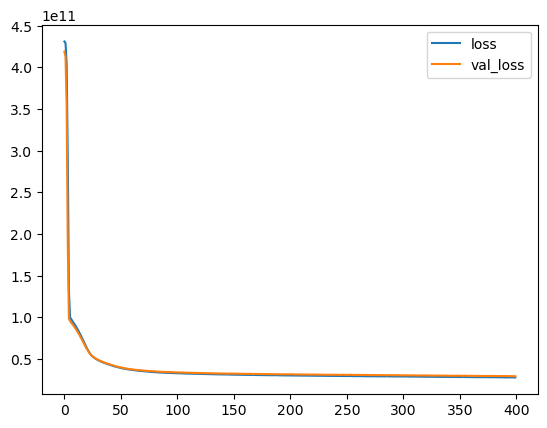

In [34]:
losses.plot()

In [35]:
predict = model.predict(X_test)

223/223 [==============================] - 1s 2ms/step


In [36]:
np.sqrt(mean_squared_error(y_test, predict))

170942.4411847484

In [37]:
mean_absolute_error(y_test, predict)

105420.3320809186

In [38]:
explained_variance_score(y_test, predict)

0.7765292622856477

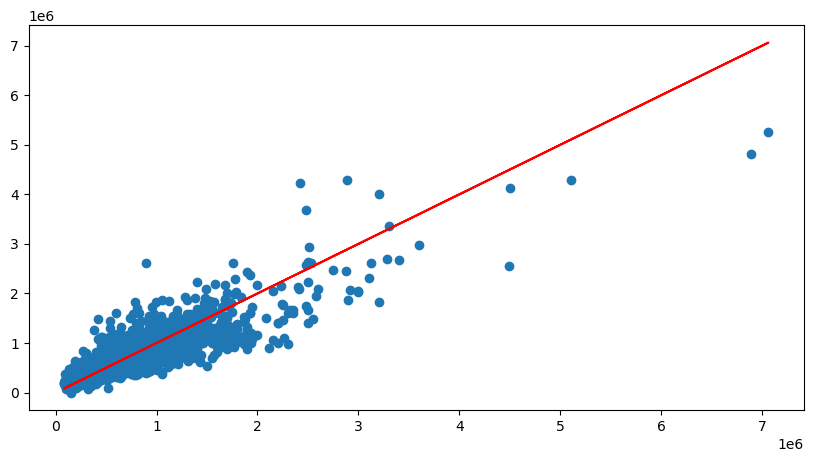

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, predict)
plt.plot(y_test, y_test, 'r')